# EEG Data Analysis

Analyze EEG data. 

In [35]:
import os
from pathlib import Path

from scipy.io import loadmat
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt

from antropy import app_entropy

from fooof import FOOOF
from fooof.utils import trim_spectrum

from neurodsp.utils import create_times
from neurodsp.spectral import compute_spectrum
from neurodsp.plts import plot_time_series, plot_power_spectra

In [36]:
# Import custom code
import sys
sys.path.append(str(Path('..').resolve()))

from apm.plts import plot_dots
from apm.wrappers import specparam_wrapper, lempelziv_wrapper
from apm.wrappers import hjorth_complexity_wrapper, dfa_wrapper, hurst_wrapper, irasa_wrapper

## Settings

In [37]:
# Define the data folder
folder = Path('/Users/tom/Documents/Data/VoytekLab/ExtractedSubsets/eeg_data')

In [38]:
# Get the list of available files
files = os.listdir(folder)
files = sorted([file for file in files if file.split('.')[-1] == 'mat'])

In [39]:
file = files[0]
file

'1000.mat'

In [40]:
# Define data information
fs = 500
n_seconds = 120

In [41]:
# Define times vector for data
times = create_times(n_seconds, fs)

## Load Data


In [42]:
#
loaded = loadmat(folder / file, squeeze_me=True)
data = loaded['oz_rest_data']

In [43]:
# Collect and load all data segments
all_data = []
for file in files:
    loaded = loadmat(folder / file, squeeze_me=True)
    all_data.append(loaded['oz_rest_data'])

## Data Checks

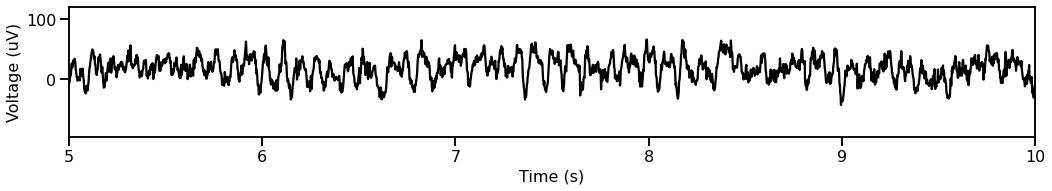

In [44]:
# Plot a segment of time series data
plot_time_series(times, data, xlim=[5, 10])

In [45]:
# Compute a power spectrum of an example
freqs, powers = compute_spectrum(data, fs, nperseg=2*fs, noverlap=fs)

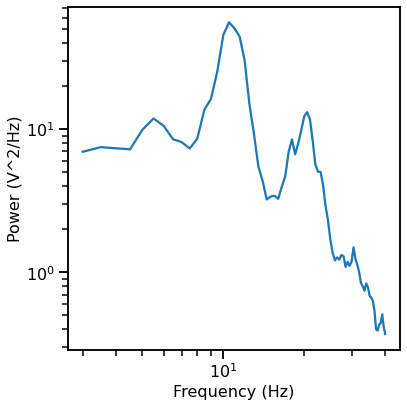

In [46]:
plot_power_spectra(*trim_spectrum(freqs, powers, [3, 40]))

## Compare Methods

In [47]:
# Settings for spectral parameterization
f_range = [3, 40]

In [48]:
# Initialize specparam model
fm = FOOOF(verbose=False)

In [50]:
# Define collectors for measures to run
measures = {'spexp' : [], 'irexp' : [], 'ent' : [],
            'hst' : [], 'dfa' : [], 'lpz' : [], 'hcx' : []}

# Calculate measures on data
for sig in all_data:
    
    # Compute aperiodic exponent from specparam & IRASA
    measures['spexp'].append(specparam_wrapper(sig, fs=fs, f_range=f_range))
    measures['irexp'].append(irasa_wrapper(sig, fs=fs, f_range=f_range))
                           
    # Compute entropy measure
    measures['ent'].append(app_entropy(sig))
    
    # Compute fluctuation measures
    #measures['hst'].append(hurst_wrapper(sig, fs=fs))
    #measures['dfa'].append(dfa_wrapper(sig, fs=fs))
    
    # Compute complexity measures
    measures['lpz'].append(lempelziv_wrapper(sig))
    measures['hcx'].append(hjorth_complexity_wrapper(sig))

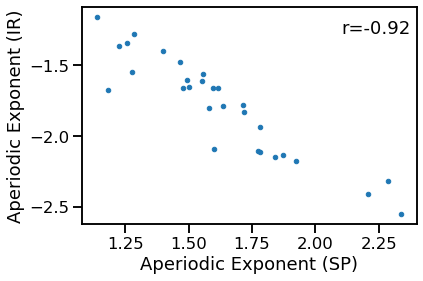

In [52]:
plot_dots(measures['spexp'], measures['irexp'],
          xlabel='Aperiodic Exponent (SP)', ylabel='Aperiodic Exponent (IR)')

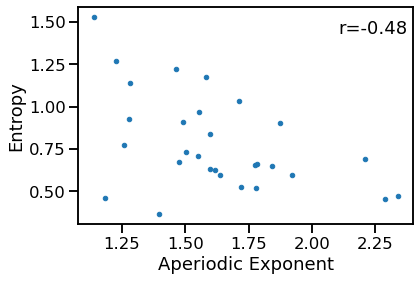

In [53]:
plot_dots(measures['spexp'], measures['ent'],
          xlabel='Aperiodic Exponent', ylabel='Entropy')